# Распознавание моделей одежды из набора данных Fashion MNIST

Используем сверточные нейронные сети для распознавания Fashion MNIST

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Учебный курс "[Программирование глубоких нейронных сетей на Python](https://www.asozykin.ru/courses/nnpython)".

<a target="_blank" href="https://colab.research.google.com/github/sozykin/dlpython_course/blob/master/cnn/fashion_mnist.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Rescaling
from tensorflow.keras.layers import Dropout, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.layers import RandomRotation, RandomTranslation, RandomFlip, RandomZoom 
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Подготовка данных для обучения сети

**Загружаем набор данных**

In [2]:
# В Keras встроены средства работы с популярными наборами данных
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Список с названиями классов

In [3]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем примеры изображений

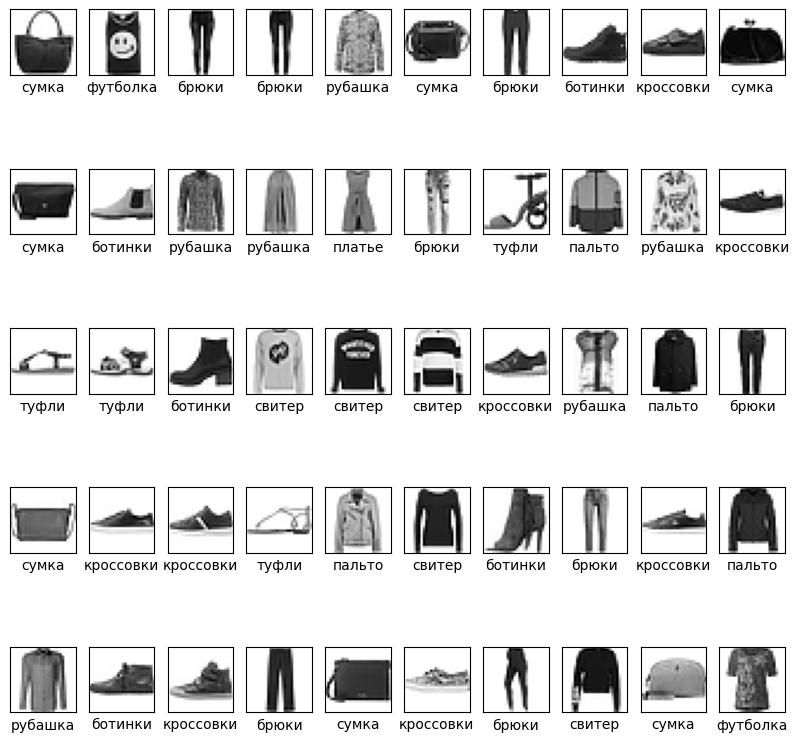

In [4]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

## Создаем нейронную сеть

**Создаем последовательную модель**

In [6]:
# Создаем последовательную модель
model = Sequential(
    [
        # Указываем размерность изображений
        Input(shape=(28, 28, 1)),
        # Предварительная обработка: нормализация
        Rescaling(1./255),
        
        # Слои расширения данных
        RandomRotation(factor=0.1),
        RandomTranslation(height_factor=0.1, width_factor=0.1),
        RandomFlip(mode="horizontal"),
        RandomZoom(height_factor=0.1, width_factor=0.1),

        # Первый сверточный слой
        Conv2D(32, (3, 3), padding='same', use_bias=False),
        BatchNormalization(),
        Activation("relu"),
        # Второй сверточный слой
        Conv2D(32, (3, 3), padding='same', use_bias=False),
        BatchNormalization(),
        Activation("relu"),       
        # Первый слой подвыборки
        MaxPooling2D(pool_size=(2, 2)),
        # Слой регуляризации Dropout
        Dropout(0.25),

        # Третий сверточный слой
        Conv2D(64, (3, 3), padding='same', use_bias=False),
        BatchNormalization(),
        Activation("relu"),        
        # Четвертый сверточный слой
        Conv2D(64, (3, 3), padding='same', use_bias=False),
        BatchNormalization(),
        Activation("relu"),        
        # Второй слой подвыборки
        MaxPooling2D(pool_size=(2, 2)),
        # Слой регуляризации Dropout
        Dropout(0.25),

        # Пятый сверточный слой
        Conv2D(128, (3, 3), padding='same', use_bias=False),
        BatchNormalization(),
        Activation("relu"),        
        # Шестой сверточный слой
        Conv2D(128, (3, 3), padding='same', use_bias=False),
        BatchNormalization(),
        Activation("relu"),        
        # Третий слой подвыборки
        MaxPooling2D(pool_size=(2, 2)),
        # Слой регуляризации Dropout
        Dropout(0.25),

        # Слой преобразования данных из 2D представления в плоское
        Flatten(),
        # Полносвязный слой для классификации
        Dense(256, activation='relu'),
        # Слой регуляризации Dropout
        Dropout(0.5),
        # Полносвязный слой для классификации
        Dense(128, activation='relu'),
        # Слой регуляризации Dropout
        Dropout(0.5),        
        # Выходной полносвязный слой
        Dense(10, activation='softmax')
    ]
)

**Компилируем сеть**

In [7]:
model.compile(loss="sparse_categorical_crossentropy", # Функция потерь, нужно преобразовывать метки в формат one hot encoding
              optimizer="adamw",                       # Оптимизатор
              metrics=["accuracy"])    


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 28, 28, 1)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_translation              │ (None, 28, 28, 1)      │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,72

 Total params: 617,130 (2.35 MB)

 Trainable params: 616,234 (2.35 MB)

 Non-trainable params: 896 (3.50 KB)

## Обучаем нейронную сеть

Задаем callbacks

In [9]:
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, 
                     min_lr=1e-7, verbose=1),
    EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
]

In [10]:
history = model.fit(x_train,              # Данные для обучения
                    y_train,              # Правильные ответы
                    batch_size=200,       # Размер мини-выборки
                    epochs=100,           # Количество эпох обучения
                    validation_split=0.2, # Доля для проверочного набора данных
                    callbacks=callbacks,  # Указываем callbacks
                    verbose=2)            # Выводить только итог обучения для каждой эпохи

Epoch 1/100
240/240 - 41s - 171ms/step - accuracy: 0.4829 - loss: 1.4208 - val_accuracy: 0.1125 - val_loss: 3.1409 - learning_rate: 1.0000e-03
Epoch 2/100
240/240 - 37s - 155ms/step - accuracy: 0.6844 - loss: 0.8724 - val_accuracy: 0.4046 - val_loss: 1.7968 - learning_rate: 1.0000e-03
Epoch 3/100
240/240 - 37s - 153ms/step - accuracy: 0.7265 - loss: 0.7476 - val_accuracy: 0.7155 - val_loss: 0.8054 - learning_rate: 1.0000e-03
Epoch 4/100
240/240 - 36s - 149ms/step - accuracy: 0.7518 - loss: 0.6818 - val_accuracy: 0.8124 - val_loss: 0.5272 - learning_rate: 1.0000e-03
Epoch 5/100
240/240 - 38s - 157ms/step - accuracy: 0.7739 - loss: 0.6314 - val_accuracy: 0.8165 - val_loss: 0.5078 - learning_rate: 1.0000e-03
Epoch 6/100
240/240 - 37s - 155ms/step - accuracy: 0.7898 - loss: 0.5917 - val_accuracy: 0.7307 - val_loss: 0.8531 - learning_rate: 1.0000e-03
Epoch 7/100
240/240 - 37s - 153ms/step - accuracy: 0.8019 - loss: 0.5612 - val_accuracy: 0.8246 - val_loss: 0.5049 - learning_rate: 1.0000e-03

KeyboardInterrupt: 

### Визуализация прогресса обучения

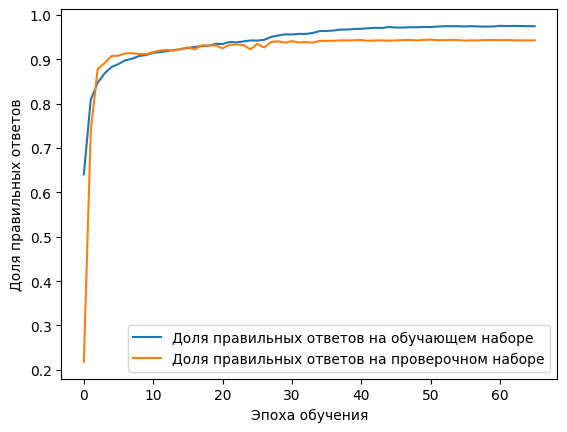

In [ ]:
plt.plot(history.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

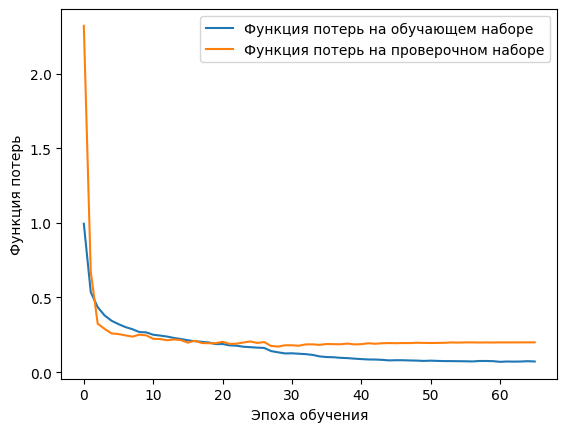

In [ ]:
plt.plot(history.history['loss'], 
         label='Функция потерь на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Функция потерь на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Функция потерь')
plt.legend()
plt.show()

## Оценка качества обучения

Проверка качества работы на наборе данных для тестирования

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9392 - loss: 0.2296


In [ ]:
print("Доля правильных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля правильных ответов на тестовых данных, в процентах: 93.92
